In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd

# Visuals
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Python chakin package previously installed by 
#    pip install chakin
import chakin  

import json
import os
from collections import defaultdict

In [2]:
chakin.search(lang='English')  # lists available indices in English

# Specify English embeddings file to download and install
# by index number, number of dimensions, and subfoder name
# Note that GloVe 50-, 100-, 200-, and 300-dimensional folders
# are downloaded with a single zip download
CHAKIN_INDEX = 18
NUMBER_OF_DIMENSIONS = 50
SUBFOLDER_NAME = "glove.twitter.27B"

DATA_FOLDER = "embeddings"
ZIP_FILE = os.path.join(DATA_FOLDER, "{}.zip".format(SUBFOLDER_NAME))
ZIP_FILE_ALT = "glove" + ZIP_FILE[5:]  # sometimes it's lowercase only...
UNZIP_FOLDER = os.path.join(DATA_FOLDER, SUBFOLDER_NAME)
if SUBFOLDER_NAME[-1] == "d":
    GLOVE_FILENAME = os.path.join(
        UNZIP_FOLDER, "{}.txt".format(SUBFOLDER_NAME))
else:
    GLOVE_FILENAME = os.path.join(UNZIP_FOLDER, "{}.{}d.txt".format(
        SUBFOLDER_NAME, NUMBER_OF_DIMENSIONS))
    
if not os.path.exists(ZIP_FILE) and not os.path.exists(UNZIP_FOLDER):
    print("Downloading embeddings to '{}'".format(ZIP_FILE))
    chakin.download(number=CHAKIN_INDEX, save_dir='./{}'.format(DATA_FOLDER))
else:
    print("Embeddings already downloaded.")

if not os.path.exists(UNZIP_FOLDER):
    import zipfile
    if not os.path.exists(ZIP_FILE) and os.path.exists(ZIP_FILE_ALT):
        ZIP_FILE = ZIP_FILE_ALT
    with zipfile.ZipFile(ZIP_FILE, "r") as zip_ref:
        print("Extracting embeddings to '{}'".format(UNZIP_FOLDER))
        zip_ref.extractall(UNZIP_FOLDER)
else:
    print("Embeddings already extracted.")

print('\nRun complete')

#-------------------------------------------------------------------------

CHAKIN_INDEX = 11
NUMBER_OF_DIMENSIONS = 50
SUBFOLDER_NAME = "gloVe.6B"

DATA_FOLDER = "embeddings"
ZIP_FILE = os.path.join(DATA_FOLDER, "{}.zip".format(SUBFOLDER_NAME))
ZIP_FILE_ALT = "glove" + ZIP_FILE[5:]  # sometimes it's lowercase only...
UNZIP_FOLDER = os.path.join(DATA_FOLDER, SUBFOLDER_NAME)
if SUBFOLDER_NAME[-1] == "d":
    GLOVE_FILENAME = os.path.join(
        UNZIP_FOLDER, "{}.txt".format(SUBFOLDER_NAME))
else:
    GLOVE_FILENAME = os.path.join(UNZIP_FOLDER, "{}.{}d.txt".format(
        SUBFOLDER_NAME, NUMBER_OF_DIMENSIONS))


if not os.path.exists(ZIP_FILE) and not os.path.exists(UNZIP_FOLDER):
    # GloVe by Stanford is licensed Apache 2.0:
    #     https://github.com/stanfordnlp/GloVe/blob/master/LICENSE
    #     http://nlp.stanford.edu/data/glove.twitter.27B.zip
    #     Copyright 2014 The Board of Trustees of The Leland Stanford Junior University
    print("Downloading embeddings to '{}'".format(ZIP_FILE))
    chakin.download(number=CHAKIN_INDEX, save_dir='./{}'.format(DATA_FOLDER))
else:
    print("Embeddings already downloaded.")

if not os.path.exists(UNZIP_FOLDER):
    import zipfile
    if not os.path.exists(ZIP_FILE) and os.path.exists(ZIP_FILE_ALT):
        ZIP_FILE = ZIP_FILE_ALT
    with zipfile.ZipFile(ZIP_FILE, "r") as zip_ref:
        print("Extracting embeddings to '{}'".format(UNZIP_FOLDER))
        zip_ref.extractall(UNZIP_FOLDER)
else:
    print("Embeddings already extracted.")

print('\nRun complete')

                   Name  Dimension                     Corpus VocabularySize  \
2          fastText(en)        300                  Wikipedia           2.5M   
11         GloVe.6B.50d         50  Wikipedia+Gigaword 5 (6B)           400K   
12        GloVe.6B.100d        100  Wikipedia+Gigaword 5 (6B)           400K   
13        GloVe.6B.200d        200  Wikipedia+Gigaword 5 (6B)           400K   
14        GloVe.6B.300d        300  Wikipedia+Gigaword 5 (6B)           400K   
15       GloVe.42B.300d        300          Common Crawl(42B)           1.9M   
16      GloVe.840B.300d        300         Common Crawl(840B)           2.2M   
17    GloVe.Twitter.25d         25               Twitter(27B)           1.2M   
18    GloVe.Twitter.50d         50               Twitter(27B)           1.2M   
19   GloVe.Twitter.100d        100               Twitter(27B)           1.2M   
20   GloVe.Twitter.200d        200               Twitter(27B)           1.2M   
21  word2vec.GoogleNews        300      

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

import os  # operating system functions
import os.path  # for manipulation of file path names

import re  # regular expressions

from collections import defaultdict

import nltk
from nltk.tokenize import TreebankWordTokenizer

import tensorflow as tf

RANDOM_SEED = 9999





import pandas as pd
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers.convolutional import Conv1D

Using TensorFlow backend.


In [4]:
# Create file paths to gdrive
RANDOM_SEED = 9999

def reset_graph(seed=RANDOM_SEED):
  '''Makes output stable across runs'''
  tf.reset_default_graph()
  tf.set_random_seed(seed)
  np.random.seed(seed)

# Declare Variables
REMOVE_STOPWORDS = False  # no stopword removal
EVOCABSIZE = 10000  # specify desired size of pre-defined embedding vocabulary

# Select the pre-defined embeddings source
embeddings_dir_one = "/Users/dannyarenson/Desktop/MSDS422/run-jump-start-rnn-sentiment-v002/embeddings/gloVe.6B"
embeddings_dir_two = "/Users/dannyarenson/Desktop/MSDS422/run-jump-start-rnn-sentiment-v002/embeddings/gloVe.6B"

filename_50 = "glove.6B.50d.txt"
filename_100 = "glove.6B.100d.txt"

embeddings_filename_50 = os.path.join(
    embeddings_dir_one, 
    embeddings_dir_two , 
    filename_50
)

embeddings_filename_100 = os.path.join(
    embeddings_dir_one, 
    embeddings_dir_two , 
    filename_100
)

In [5]:
def reset_graph(seed= RANDOM_SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

REMOVE_STOPWORDS = False # no stopword removal 
EVOCABSIZE = 10000  # specify desired size of pre-defined embedding vocabulary

embeddings_directory = 'embeddings/glove.twitter.27B'
filename = 'glove.twitter.27B.100d.txt'

embeddings_filename = os.path.join(embeddings_directory, filename)
embeddings_filename

'embeddings/glove.twitter.27B/glove.twitter.27B.100d.txt'

In [6]:
# Utility function for loading embeddings
# Creates the Python defaultdict dictionary word_to_embedding_dict
# for the requested pre-trained word embeddings
# Note the use of defaultdict data structure from the Python Standard Library
# collections_defaultdict.py lets the caller specify a default value up front
# The default value will be retuned if the key is not a known dictionary key
# That is, unknown words are represented by a vector of zeros
# For word embeddings, this default value is a vector of zeros

def load_embedding_from_disks(embeddings_filename, with_indexes=True):
    """
    Read a embeddings txt file. If `with_indexes=True`,
    we return a tuple of two dictionnaries
    `(word_to_index_dict, index_to_embedding_array)`,
    otherwise we return only a direct
    `word_to_embedding_dict` dictionnary mapping
    from a string to a numpy array.
    """
    if with_indexes:
        word_to_index_dict = dict()
        index_to_embedding_array = []

    else:
        word_to_embedding_dict = dict()

    with open(embeddings_filename, "r", encoding="utf-8") as embeddings_file:
        for (i, line) in enumerate(embeddings_file):

            split = line.split(" ")

            word = split[0]

            representation = split[1:]
            representation = np.array([float(val) for val in representation])

            if with_indexes:
                word_to_index_dict[word] = i
                index_to_embedding_array.append(representation)
            else:
                word_to_embedding_dict[word] = representation

    # Empty representation for unknown words.
    _WORD_NOT_FOUND = [0.0] * len(representation)
    if with_indexes:
        _LAST_INDEX = i + 1
        word_to_index_dict = defaultdict(lambda: _LAST_INDEX, word_to_index_dict)
        index_to_embedding_array = np.array(
            index_to_embedding_array + [_WORD_NOT_FOUND]
        )
        return word_to_index_dict, index_to_embedding_array
    else:
        word_to_embedding_dict = defaultdict(lambda: _WORD_NOT_FOUND)
        return word_to_embedding_dict
    
print('\nLoading embeddings from', embeddings_filename)
word_to_index, index_to_embedding = \
    load_embedding_from_disks(embeddings_filename, with_indexes=True)
print("Embedding loaded from disks.")


Loading embeddings from embeddings/glove.twitter.27B/glove.twitter.27B.100d.txt
Embedding loaded from disks.


In [7]:
# Load embeddings for glove 50
print("Loading embeddings from", embeddings_filename_50)

word_to_index_50, index_to_embedding_50 = load_embedding_from_disks(
    embeddings_filename_50, with_indexes=True
)

print("Embedding loaded from disks.")

Loading embeddings from /Users/dannyarenson/Desktop/MSDS422/run-jump-start-rnn-sentiment-v002/embeddings/gloVe.6B/glove.6B.50d.txt
Embedding loaded from disks.


In [8]:
# Load embeddings for glove 100
print("Loading embeddings from", embeddings_filename_100)

word_to_index_100, index_to_embedding_100 = load_embedding_from_disks(
    embeddings_filename_100, with_indexes=True
)

print("Embedding loaded from disks.")

Loading embeddings from /Users/dannyarenson/Desktop/MSDS422/run-jump-start-rnn-sentiment-v002/embeddings/gloVe.6B/glove.6B.100d.txt
Embedding loaded from disks.


In [10]:
# Check embedding size/shapes
vocab_size_50, embedding_dim_50 = index_to_embedding_50.shape
print("50 Dimension embedding ---------------------------------------")
print("Embedding is of shape: {}".format(index_to_embedding_50.shape))
print("The first words are words that tend occur more often.\n")

vocab_size_100, embedding_dim_100 = index_to_embedding_100.shape
print("100 Dimension embedding ---------------------------------------")
print("Embedding is of shape: {}".format(index_to_embedding_100.shape))
print("This means (number of words, number of dimensions per word)\n")
print("The first words are words that tend occur more often.")

vocab_size, embedding_dim = index_to_embedding.shape
print("Embedding is of shape: {}".format(index_to_embedding.shape))
print("This means (number of words, number of dimensions per word)\n")
print("The first words are words that tend occur more often.")

print("Note: for unknown words, the representation is an empty vector,\n"
      "and the index is the last one. The dictionnary has a limit:")
print("    {} --> {} --> {}".format("A word", "Index in embedding", 
      "Representation"))
word = "worsdfkljsdf"  # a word obviously not in the vocabulary
idx = word_to_index[word] # index for word obviously not in the vocabulary
complete_vocabulary_size = idx 
embd = list(np.array(index_to_embedding[idx], dtype=int)) # "int" compact print
#print("    {} --> {} --> {}".format(word, idx, embd))
word = "the"
idx = word_to_index[word]
embd = list(index_to_embedding[idx])

50 Dimension embedding ---------------------------------------
Embedding is of shape: (400001, 50)
The first words are words that tend occur more often.

100 Dimension embedding ---------------------------------------
Embedding is of shape: (400001, 100)
This means (number of words, number of dimensions per word)

The first words are words that tend occur more often.
Embedding is of shape: (1193515, 100)
This means (number of words, number of dimensions per word)

The first words are words that tend occur more often.
Note: for unknown words, the representation is an empty vector,
and the index is the last one. The dictionnary has a limit:
    A word --> Index in embedding --> Representation


In [11]:
# Show how to use embeddings dictionaries with a test sentence
# This is a famous typing exercise with all letters of the alphabet
# https://en.wikipedia.org/wiki/The_quick_brown_fox_jumps_over_the_lazy_dog
a_typing_test_sentence = "The quick brown fox jumps over the lazy dog"
print("\nTest sentence: ", a_typing_test_sentence, "\n")
words_in_test_sentence = a_typing_test_sentence.split()

for word in words_in_test_sentence:
    word_ = word.lower()
    embedding = index_to_embedding_50[word_to_index_50[word_]]
    print(word_ + ": ", embedding)


Test sentence:  The quick brown fox jumps over the lazy dog 

the:  [ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]
quick:  [ 0.13967   -0.53798   -0.18047   -0.25142    0.16203   -0.13868
 -0.24637    0.75111    0.27264    0.61035   -0.82548    0.038647
 -0.32361    0.30373   -0.14598   -0.23551    0.39267   -1.1287
 -0.23636   -1.0629     0.046277   0.29143   -0.25819   -0.094902
  0.79478   -1.2095    -0.01039   -0.092086   0.8432

In [12]:
# Check 100 embeddings
for word in words_in_test_sentence:
    word_ = word.lower()
    embedding = index_to_embedding_100[word_to_index_100[word_]]
    print(word_ + ": ", embedding)

the:  [-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.2

### Model Preprocessing
#### File Load Preparation

In [13]:
# Define vocabulary size for the language model
# To reduce the size of the vocabulary to the n most frequently used words

def default_factory():
    return EVOCABSIZE  # last/unknown-word row in limited_index_to_embedding


# dictionary has the items() function, returns list of (key, value) tuples
limited_word_to_index_50 = defaultdict(
    default_factory, {k: v for k, v in word_to_index_50.items() if v < EVOCABSIZE}
)

# Select the first EVOCABSIZE rows to the index_to_embedding
limited_index_to_embedding_50 = index_to_embedding_50[0:EVOCABSIZE, :]

# Set the unknown-word row to be all zeros as previously
limited_index_to_embedding_50 = np.append(
    limited_index_to_embedding_50,
    index_to_embedding_50[index_to_embedding_50.shape[0] - 1, :].reshape(1, embedding_dim_50),
    axis=0,
)

# Delete large numpy array to clear some CPU RAM
del index_to_embedding_50

In [14]:
# dictionary has the items() function, returns list of (key, value) tuples
limited_word_to_index_100 = defaultdict(
    default_factory, {k: v for k, v in word_to_index_100.items() if v < EVOCABSIZE}
)

# Select the first EVOCABSIZE rows to the index_to_embedding
limited_index_to_embedding_100 = index_to_embedding_100[0:EVOCABSIZE, :]

# Set the unknown-word row to be all zeros as previously
limited_index_to_embedding_100 = np.append(
    limited_index_to_embedding_100,
    index_to_embedding_100[index_to_embedding_100.shape[0] - 1, :].reshape(1, embedding_dim_100),
    axis=0,
)

# Delete large numpy array to clear some CPU RAM
del index_to_embedding_100

In [15]:
# code for working with movie reviews data
# Source: Miller, T. W. (2016). Web and Network Data Science.
#    Upper Saddle River, N.J.: Pearson Education.
#    ISBN-13: 978-0-13-388644-3
# This original study used a simple bag-of-words approach
# to sentiment analysis, along with pre-defined lists of
# negative and positive words.
# Code available at:  https://github.com/mtpa/wnds
# ------------------------------------------------------------
# Utility function to get file names within a directory
def listdir_no_hidden(path):
    start_list = os.listdir(path)
    end_list = []
    for file in start_list:
        if not file.startswith("."):
            end_list.append(file)
    return end_list


# define list of codes to be dropped from document
# carriage-returns, line-feeds, tabs
codelist = ["\r", "\n", "\t"]

In [16]:
# We will not remove stopwords in this exercise because they are
# important to keeping sentences intact
if REMOVE_STOPWORDS:
    print(nltk.corpus.stopwords.words("english"))

    # previous analysis of a list of top terms showed a number of words, along
    # with contractions and other word strings to drop from further analysis, add
    # these to the usual English stopwords to be dropped from a document collection
    more_stop_words = [
        "cant",
        "didnt",
        "doesnt",
        "dont",
        "goes",
        "isnt",
        "hes",
        "shes",
        "thats",
        "theres",
        "theyre",
        "wont",
        "youll",
        "youre",
        "youve",
        "br" "ve",
        "re",
        "vs",
    ]

    some_proper_nouns_to_remove = [
        "dick",
        "ginger",
        "hollywood",
        "jack",
        "jill",
        "john",
        "karloff",
        "kudrow",
        "orson",
        "peter",
        "tcm",
        "tom",
        "toni",
        "welles",
        "william",
        "wolheim",
        "nikita",
    ]

    # start with the initial list and add to it for movie text work
    stoplist = (
        nltk.corpus.stopwords.words("english")
        + more_stop_words
        + some_proper_nouns_to_remove
    )

In [17]:
# text parsing function for creating text documents
# there is more we could do for data preparation
# stemming... looking for contractions... possessives...
# but we will work with what we have in this parsing function
# if we want to do stemming at a later time, we can use
#     porter = nltk.PorterStemmer()
# in a construction like this
#     words_stemmed =  [porter.stem(word) for word in initial_words]
def text_parse(string):
    # replace non-alphanumeric with space
    temp_string = re.sub("[^a-zA-Z]", "  ", string)
    # replace codes with space
    for i in range(len(codelist)):
        stopstring = " " + codelist[i] + "  "
        temp_string = re.sub(stopstring, "  ", temp_string)
    # replace single-character words with space
    temp_string = re.sub("\s.\s", " ", temp_string)
    # convert uppercase to lowercase
    temp_string = temp_string.lower()
    if REMOVE_STOPWORDS:
        # replace selected character strings/stop-words with space
        for i in range(len(stoplist)):
            stopstring = " " + str(stoplist[i]) + " "
            temp_string = re.sub(stopstring, " ", temp_string)
    # replace multiple blank characters with one blank character
    temp_string = re.sub("\s+", " ", temp_string)
    return temp_string

### Load Review Data

In [18]:
# -----------------------------------------------
# gather data for 500 negative movie reviews
# -----------------------------------------------
dir_name = 'movie-reviews-negative'
    
filenames = listdir_no_hidden(path=dir_name)
num_files = len(filenames)

for i in range(len(filenames)):
    file_exists = os.path.isfile(os.path.join(dir_name, filenames[i]))
    assert file_exists
print('\nDirectory:',dir_name)    
print('%d files found' % len(filenames))

# Read data for negative movie reviews
# Data will be stored in a list of lists where the each list represents 
# a document and document is a list of words.
# We then break the text into words.

def read_data(filename):

  with open(filename, encoding='utf-8') as f:
    data = tf.compat.as_str(f.read())
    data = data.lower()
    data = text_parse(data)
    data = TreebankWordTokenizer().tokenize(data)  # The Penn Treebank

  return data

negative_documents = []

print('\nProcessing document files under', dir_name)
for i in range(num_files):
    ## print(' ', filenames[i])

    words = read_data(os.path.join(dir_name, filenames[i]))

    negative_documents.append(words)
    # print('Data size (Characters) (Document %d) %d' %(i,len(words)))
    # print('Sample string (Document %d) %s'%(i,words[:50]))


Directory: movie-reviews-negative
500 files found

Processing document files under movie-reviews-negative


In [19]:
# -----------------------------------------------
# gather data for 500 positive movie reviews
# -----------------------------------------------
dir_name = 'movie-reviews-positive'  
filenames = listdir_no_hidden(path=dir_name)
num_files = len(filenames)

for i in range(len(filenames)):
    file_exists = os.path.isfile(os.path.join(dir_name, filenames[i]))
    assert file_exists
print('\nDirectory:',dir_name)    
print('%d files found' % len(filenames))

# Read data for positive movie reviews
# Data will be stored in a list of lists where the each list 
# represents a document and document is a list of words.
# We then break the text into words.

def read_data(filename):

  with open(filename, encoding='utf-8') as f:
    data = tf.compat.as_str(f.read())
    data = data.lower()
    data = text_parse(data)
    data = TreebankWordTokenizer().tokenize(data)  # The Penn Treebank

  return data

positive_documents = []

print('\nProcessing document files under', dir_name)
for i in range(num_files):
    ## print(' ', filenames[i])

    words = read_data(os.path.join(dir_name, filenames[i]))

    positive_documents.append(words)
    # print('Data size (Characters) (Document %d) %d' %(i,len(words)))
    # print('Sample string (Document %d) %s'%(i,words[:50]))


Directory: movie-reviews-positive
500 files found

Processing document files under movie-reviews-positive


In [20]:
# -----------------------------------------------------
# convert positive/negative documents into numpy array
# note that reviews vary from 22 to 1052 words
# so we use the first 20 and last 20 words of each review
# as our word sequences for analysis
# -----------------------------------------------------
max_review_length = 0  # initialize
for doc in negative_documents:
    max_review_length = max(max_review_length, len(doc))
for doc in positive_documents:
    max_review_length = max(max_review_length, len(doc))
print("max_review_length:", max_review_length)

min_review_length = max_review_length  # initialize
for doc in negative_documents:
    min_review_length = min(min_review_length, len(doc))
for doc in positive_documents:
    min_review_length = min(min_review_length, len(doc))
print("min_review_length:", min_review_length)

max_review_length: 1052
min_review_length: 22


In [21]:
# construct list of 1000 lists with 40 words in each list
from itertools import chain

documents = []

for doc in negative_documents:
    doc_begin = doc[0:20]
    doc_end = doc[len(doc) - 20 : len(doc)]
    documents.append(list(chain(*[doc_begin, doc_end])))
    
for doc in positive_documents:
    doc_begin = doc[0:20]
    doc_end = doc[len(doc) - 20 : len(doc)]
    documents.append(list(chain(*[doc_begin, doc_end])))

In [22]:
# create list of lists of lists for embeddings
embeddings_50 = []

for doc in documents:
    embedding = []
    for word in doc:
        embedding.append(limited_index_to_embedding_50[limited_word_to_index_50[word]])
    embeddings_50.append(embedding)

In [23]:
# create list of lists of lists for embeddings
embeddings_100 = []

for doc in documents:
    embedding = []
    for word in doc:
        embedding.append(limited_index_to_embedding_100[limited_word_to_index_100[word]])
    embeddings_100.append(embedding)

In [24]:
# -----------------------------------------------------
# Check on the embeddings list of list of lists
# -----------------------------------------------------
# Show the first word in the first document
test_word = documents[0][0]
print("First word in first document:", test_word)
print(
    "Embedding for this word:\n",
    limited_index_to_embedding_50[limited_word_to_index_50[test_word]],
)
print(
    "Corresponding embedding from embeddings list of list of lists\n",
    embeddings_50[0][0][:],
)

First word in first document: while
Embedding for this word:
 [ 0.1011   -0.16566   0.22035  -0.10629   0.46929   0.37968  -0.62815
 -0.14385  -0.38333   0.055405  0.23511  -0.20999  -0.55395  -0.38271
  0.21008   0.02161  -0.23054  -0.13576  -0.61636  -0.4678    0.25716
  0.62309   0.3837   -0.25665   0.09041  -1.5184    0.4762   -0.089573
  0.025347 -0.25974   3.6121    0.62788   0.15387  -0.062747  0.28699
 -0.16471  -0.2079    0.4407    0.065441 -0.10303  -0.15489   0.27352
  0.38356  -0.098016  0.10705  -0.083071 -0.27168  -0.49441   0.043538
 -0.39141 ]
Corresponding embedding from embeddings list of list of lists
 [ 0.1011   -0.16566   0.22035  -0.10629   0.46929   0.37968  -0.62815
 -0.14385  -0.38333   0.055405  0.23511  -0.20999  -0.55395  -0.38271
  0.21008   0.02161  -0.23054  -0.13576  -0.61636  -0.4678    0.25716
  0.62309   0.3837   -0.25665   0.09041  -1.5184    0.4762   -0.089573
  0.025347 -0.25974   3.6121    0.62788   0.15387  -0.062747  0.28699
 -0.16471  -0.2079  

In [25]:
# -----------------------------------------------------
# Make embeddings a numpy array for use in an RNN
# Create training and test sets with Scikit Learn
# -----------------------------------------------------
embeddings_array_50 = np.array(embeddings_50)

# Define the labels to be used 500 negative (0) and 500 positive (1)
thumbs_down_up = np.concatenate(
    (np.zeros((500), dtype=np.int32), np.ones((500), dtype=np.int32)), axis=0
)

In [26]:
embeddings_array_100 = np.array(embeddings_100)

In [27]:
# Review the shape
print(embeddings_array_50.shape)
print(embeddings_array_100.shape)
print(thumbs_down_up.shape)

(1000, 40, 50)
(1000, 40, 100)
(1000,)


### Modeling
#### Train Test Split


In [28]:
# Scikit Learn for random splitting of the data
from sklearn.model_selection import train_test_split

# Random splitting of the data in to training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    embeddings_array_50, thumbs_down_up, test_size=0.20, random_state=RANDOM_SEED
)

In [29]:
# Random splitting of the data in to training (80%) and test (20%)
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(
    embeddings_array_100, thumbs_down_up, test_size=0.20, random_state=RANDOM_SEED
)

In [30]:
print(X_train.shape)
print(X_train_100.shape)

(800, 40, 50)
(800, 40, 100)


#### Model 1:
* 20 Neurons
* 50 dimensions of pre-trained embeddings
* 50 epochs
* 100 batch size

In [31]:
# Build Model
reset_graph()

n_steps = embeddings_array_50.shape[1]  # number of words per document
n_inputs = embeddings_array_50.shape[2]  # dimension of  pre-trained embeddings
n_neurons = 20  # analyst specified number of neurons
n_outputs = 2  # thumbs-down or thumbs-up

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 50
batch_size = 100

with tf.Session() as sess:
    init.run()
    print("Start of Training: Embeddings = 50")
    epochs = []
    train_acc = []
    test_acc = []
    for epoch in range(n_epochs):
        print("\n  ---- Epoch ", epoch + 1, " ----")
        epochs.append(epoch + 1)
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train[iteration * batch_size : (iteration + 1) * batch_size, :]
            y_batch = y_train[iteration * batch_size : (iteration + 1) * batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Train accuracy:", acc_train, "Test accuracy:", acc_test)
        train_acc.append(acc_train)
        test_acc.append(acc_test)
    print("End of Training")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Start of Training: Embeddings = 50

  ---- Epoch  1  ----
Train accuracy: 0.5 Test ac

#### Model 2:
* 30 Neurons
* 50 dimensions of pre-trained embeddings
* 25 epochs
* 100 batch size

In [32]:
# Build the model
reset_graph()

n_steps = embeddings_array_50.shape[1]  # number of words per document
n_inputs = embeddings_array_50.shape[2]  # dimension of  pre-trained embeddings
n_neurons = 30  # analyst specified number of neurons
n_outputs = 2  # thumbs-down or thumbs-up

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 25
batch_size = 100

with tf.Session() as sess:
    init.run()
    print("Start of Training: Embeddings = 50")
    epochs = []
    train_acc = []
    test_acc = []
    for epoch in range(n_epochs):
        print("\n  ---- Epoch ", epoch + 1, " ----")
        epochs.append(epoch + 1)
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train[iteration * batch_size : (iteration + 1) * batch_size, :]
            y_batch = y_train[iteration * batch_size : (iteration + 1) * batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Train accuracy:", acc_train, "Test accuracy:", acc_test)
        train_acc.append(acc_train)
        test_acc.append(acc_test)
    print("End of Training")

Start of Training: Embeddings = 50

  ---- Epoch  1  ----
Train accuracy: 0.49 Test accuracy: 0.455

  ---- Epoch  2  ----
Train accuracy: 0.49 Test accuracy: 0.455

  ---- Epoch  3  ----
Train accuracy: 0.53 Test accuracy: 0.5

  ---- Epoch  4  ----
Train accuracy: 0.48 Test accuracy: 0.54

  ---- Epoch  5  ----
Train accuracy: 0.51 Test accuracy: 0.53

  ---- Epoch  6  ----
Train accuracy: 0.57 Test accuracy: 0.525

  ---- Epoch  7  ----
Train accuracy: 0.59 Test accuracy: 0.545

  ---- Epoch  8  ----
Train accuracy: 0.59 Test accuracy: 0.565

  ---- Epoch  9  ----
Train accuracy: 0.61 Test accuracy: 0.565

  ---- Epoch  10  ----
Train accuracy: 0.6 Test accuracy: 0.56

  ---- Epoch  11  ----
Train accuracy: 0.62 Test accuracy: 0.56

  ---- Epoch  12  ----
Train accuracy: 0.63 Test accuracy: 0.565

  ---- Epoch  13  ----
Train accuracy: 0.65 Test accuracy: 0.57

  ---- Epoch  14  ----
Train accuracy: 0.67 Test accuracy: 0.58

  ---- Epoch  15  ----
Train accuracy: 0.68 Test accuracy:

#### Model 3:
* 20 neurons
* 100 dimensions of pre-trained embeddings
* 50 epochs
* 100 batch size

In [33]:
# Build the model
reset_graph()

n_steps = embeddings_array_100.shape[1]  # number of words per document
n_inputs = embeddings_array_100.shape[2]  # dimension of  pre-trained embeddings
n_neurons = 20  # analyst specified number of neurons
n_outputs = 2  # thumbs-down or thumbs-up

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 50
batch_size = 100

with tf.Session() as sess:
    init.run()
    print("Start of Training: Embeddings = 100")
    epochs = []
    train_acc = []
    test_acc = []
    for epoch in range(n_epochs):
        print("\n  ---- Epoch ", epoch + 1, " ----")
        epochs.append(epoch + 1)
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train_100[iteration * batch_size : (iteration + 1) * batch_size, :]
            y_batch = y_train_100[iteration * batch_size : (iteration + 1) * batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test_100, y: y_test_100})
        print("Train accuracy:", acc_train, "Test accuracy:", acc_test)
        train_acc.append(acc_train)
        test_acc.append(acc_test)
    print("End of Training")

Start of Training: Embeddings = 100

  ---- Epoch  1  ----
Train accuracy: 0.46 Test accuracy: 0.52

  ---- Epoch  2  ----
Train accuracy: 0.5 Test accuracy: 0.565

  ---- Epoch  3  ----
Train accuracy: 0.53 Test accuracy: 0.55

  ---- Epoch  4  ----
Train accuracy: 0.58 Test accuracy: 0.57

  ---- Epoch  5  ----
Train accuracy: 0.59 Test accuracy: 0.58

  ---- Epoch  6  ----
Train accuracy: 0.6 Test accuracy: 0.55

  ---- Epoch  7  ----
Train accuracy: 0.61 Test accuracy: 0.565

  ---- Epoch  8  ----
Train accuracy: 0.62 Test accuracy: 0.58

  ---- Epoch  9  ----
Train accuracy: 0.63 Test accuracy: 0.595

  ---- Epoch  10  ----
Train accuracy: 0.65 Test accuracy: 0.585

  ---- Epoch  11  ----
Train accuracy: 0.64 Test accuracy: 0.59

  ---- Epoch  12  ----
Train accuracy: 0.65 Test accuracy: 0.595

  ---- Epoch  13  ----
Train accuracy: 0.67 Test accuracy: 0.6

  ---- Epoch  14  ----
Train accuracy: 0.67 Test accuracy: 0.6

  ---- Epoch  15  ----
Train accuracy: 0.69 Test accuracy: 0.

#### Model 4:
* 30 Neurons
* 100 dimensions of pre-trained embeddings
* 25 epochs
* 100 batch size

In [34]:
#Build the model
reset_graph()

n_steps = embeddings_array_100.shape[1]  # number of words per document
n_inputs = embeddings_array_100.shape[2]  # dimension of  pre-trained embeddings
n_neurons = 30  # analyst specified number of neurons
n_outputs = 2  # thumbs-down or thumbs-up

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 25
batch_size = 100

with tf.Session() as sess:
    init.run()
    print("Start of Training: Embeddings = 100")
    epochs = []
    train_acc = []
    test_acc = []
    for epoch in range(n_epochs):
        print("\n  ---- Epoch ", epoch + 1, " ----")
        epochs.append(epoch + 1)
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train_100[iteration * batch_size : (iteration + 1) * batch_size, :]
            y_batch = y_train_100[iteration * batch_size : (iteration + 1) * batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test_100, y: y_test_100})
        print("Train accuracy:", acc_train, "Test accuracy:", acc_test)
        train_acc.append(acc_train)
        test_acc.append(acc_test)
    print("End of Training")

Start of Training: Embeddings = 100

  ---- Epoch  1  ----
Train accuracy: 0.56 Test accuracy: 0.54

  ---- Epoch  2  ----
Train accuracy: 0.57 Test accuracy: 0.56

  ---- Epoch  3  ----
Train accuracy: 0.59 Test accuracy: 0.555

  ---- Epoch  4  ----
Train accuracy: 0.59 Test accuracy: 0.595

  ---- Epoch  5  ----
Train accuracy: 0.62 Test accuracy: 0.615

  ---- Epoch  6  ----
Train accuracy: 0.65 Test accuracy: 0.62

  ---- Epoch  7  ----
Train accuracy: 0.69 Test accuracy: 0.605

  ---- Epoch  8  ----
Train accuracy: 0.69 Test accuracy: 0.605

  ---- Epoch  9  ----
Train accuracy: 0.72 Test accuracy: 0.605

  ---- Epoch  10  ----
Train accuracy: 0.76 Test accuracy: 0.61

  ---- Epoch  11  ----
Train accuracy: 0.76 Test accuracy: 0.625

  ---- Epoch  12  ----
Train accuracy: 0.77 Test accuracy: 0.62

  ---- Epoch  13  ----
Train accuracy: 0.79 Test accuracy: 0.64

  ---- Epoch  14  ----
Train accuracy: 0.76 Test accuracy: 0.64

  ---- Epoch  15  ----
Train accuracy: 0.79 Test accura

#### Model 5:
* 30 Neurons
* 100 dimensions of pre-trained embeddings
* 40 epochs
* 100 batch size

In [35]:
# Build the model
reset_graph()

n_steps = embeddings_array_100.shape[1]  # number of words per document
n_inputs = embeddings_array_100.shape[2]  # dimension of  pre-trained embeddings
n_neurons = 20  # analyst specified number of neurons
n_outputs = 2  # thumbs-down or thumbs-up

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 40
batch_size = 100

with tf.Session() as sess:
    init.run()
    print("Start of Training: Embeddings = 50")
    epochs = []
    train_acc = []
    test_acc = []
    for epoch in range(n_epochs):
        print("\n  ---- Epoch ", epoch + 1, " ----")
        epochs.append(epoch + 1)
        for iteration in range(y_train.shape[0] // batch_size):
            X_batch = X_train_100[iteration * batch_size : (iteration + 1) * batch_size, :]
            y_batch = y_train_100[iteration * batch_size : (iteration + 1) * batch_size]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test_100, y: y_test_100})
        print("Train accuracy:", acc_train, "Test accuracy:", acc_test)
        train_acc.append(acc_train)
        test_acc.append(acc_test)
    print("End of Training")

Start of Training: Embeddings = 50

  ---- Epoch  1  ----
Train accuracy: 0.46 Test accuracy: 0.52

  ---- Epoch  2  ----
Train accuracy: 0.5 Test accuracy: 0.565

  ---- Epoch  3  ----
Train accuracy: 0.53 Test accuracy: 0.55

  ---- Epoch  4  ----
Train accuracy: 0.58 Test accuracy: 0.57

  ---- Epoch  5  ----
Train accuracy: 0.59 Test accuracy: 0.58

  ---- Epoch  6  ----
Train accuracy: 0.6 Test accuracy: 0.55

  ---- Epoch  7  ----
Train accuracy: 0.61 Test accuracy: 0.565

  ---- Epoch  8  ----
Train accuracy: 0.62 Test accuracy: 0.58

  ---- Epoch  9  ----
Train accuracy: 0.63 Test accuracy: 0.595

  ---- Epoch  10  ----
Train accuracy: 0.65 Test accuracy: 0.585

  ---- Epoch  11  ----
Train accuracy: 0.64 Test accuracy: 0.59

  ---- Epoch  12  ----
Train accuracy: 0.65 Test accuracy: 0.595

  ---- Epoch  13  ----
Train accuracy: 0.67 Test accuracy: 0.6

  ---- Epoch  14  ----
Train accuracy: 0.67 Test accuracy: 0.6

  ---- Epoch  15  ----
Train accuracy: 0.69 Test accuracy: 0.6

In [36]:
def default_factory():
    return EVOCABSIZE  # last/unknown-word row in limited_index_to_embedding
# dictionary has the items() function, returns list of (key, value) tuples
limited_word_to_index = defaultdict(default_factory, \
    {k: v for k, v in word_to_index.items() if v < EVOCABSIZE})

# Select the first EVOCABSIZE rows to the index_to_embedding
limited_index_to_embedding = index_to_embedding[0:EVOCABSIZE,:]
# Set the unknown-word row to be all zeros as previously
limited_index_to_embedding = np.append(limited_index_to_embedding, 
    index_to_embedding[index_to_embedding.shape[0] - 1, :].\
        reshape(1,embedding_dim), 
    axis = 0)

# Delete large numpy array to clear some CPU RAM
del index_to_embedding

# Verify the new vocabulary: should get same embeddings for test sentence
# Note that a small EVOCABSIZE may yield some zero vectors for embeddings
print('\nTest sentence embeddings from vocabulary of', EVOCABSIZE, 'words:\n')
for word in words_in_test_sentence:
    word_ = word.lower()
    embedding = limited_index_to_embedding[limited_word_to_index[word_]]
    print(word_ + ": ", embedding)


Test sentence embeddings from vocabulary of 10000 words:

the:  [ 9.5152e-02  3.7024e-01  5.4291e-01  1.9621e-01  4.8205e-02  3.2033e-01
 -5.9638e-01  1.5868e-02 -1.2989e-01 -6.3028e-01  8.1944e-02  2.4164e-01
 -6.0990e+00 -6.8557e-01  5.0354e-01 -3.4089e-02  1.1705e-01 -7.7403e-03
 -8.6512e-02  4.3617e-01 -4.3982e-01  2.6125e-01 -4.0348e-02 -1.9194e-01
  8.3204e-02 -5.8246e-01 -3.1923e-02  1.2630e-01  4.0120e-01  6.8906e-02
 -1.0517e-01 -2.0804e-01 -4.2554e-01  4.7799e-01  3.4651e-01  2.4057e-01
  5.0244e-02 -7.2587e-02 -2.4347e-03 -5.0342e-01 -1.0601e+00 -3.1586e-01
 -3.2457e-02 -7.6317e-02  7.9045e-01  8.6367e-02 -1.9632e-01  5.7566e-02
  8.4129e-01 -4.2020e-01 -1.1335e-03 -8.5632e-02  6.1910e-02  2.1423e-01
 -1.0356e-01 -3.6946e-02 -2.6005e-01 -3.5657e-01  5.4321e-02  3.0875e-02
  1.4092e-01 -9.1998e-02 -4.1841e-01 -3.1135e-01 -1.4937e-01 -2.2699e-04
 -3.3454e-01 -1.4848e-01 -1.1944e-01 -2.7174e-01  3.1320e-01 -1.0998e-01
 -4.7524e-01  1.4056e-01  3.9641e-01 -4.9413e-02 -4.2601e-0

In [37]:
# -----------------------------------------------------
# convert positive/negative documents into numpy array
# note that reviews vary from 22 to 1052 words   
# so we use the first 20 and last 20 words of each review 
# as our word sequences for analysis
# -----------------------------------------------------
max_review_length = 0  # initialize
for doc in negative_documents:
    max_review_length = max(max_review_length, len(doc))    
for doc in positive_documents:
    max_review_length = max(max_review_length, len(doc)) 
print('max_review_length:', max_review_length) 

min_review_length = max_review_length  # initialize
for doc in negative_documents:
    min_review_length = min(min_review_length, len(doc))    
for doc in positive_documents:
    min_review_length = min(min_review_length, len(doc)) 
print('min_review_length:', min_review_length) 

# construct list of 1000 lists with 20 words in each list
from itertools import chain
documents = []
for doc in negative_documents:
    doc_begin = doc[0:20]
    doc_end = doc[len(doc) - 20: len(doc)]
    documents.append(list(chain(*[doc_begin, doc_end])))    
for doc in positive_documents:
    doc_begin = doc[0:20]
    doc_end = doc[len(doc) - 20: len(doc)]
    documents.append(list(chain(*[doc_begin, doc_end])))    

# create list of lists of lists for embeddings
embeddings = []    
for doc in documents:
    embedding = []
    for word in doc:
       embedding.append(limited_index_to_embedding[limited_word_to_index[word]]) 
    embeddings.append(embedding)
    
#embeddings

max_review_length: 1052
min_review_length: 22


In [38]:
# -----------------------------------------------------    
# Check on the embeddings list of list of lists 
# -----------------------------------------------------
# Show the first word in the first document
test_word = documents[0][0]    
print('First word in first document:', test_word)    
print('Embedding for this word:\n', 
      limited_index_to_embedding[limited_word_to_index[test_word]])
print('Corresponding embedding from embeddings list of list of lists\n',
      embeddings[0][0][:])

# Show the seventh word in the tenth document
test_word = documents[6][9]    
print('First word in first document:', test_word)    
print('Embedding for this word:\n', 
      limited_index_to_embedding[limited_word_to_index[test_word]])
print('Corresponding embedding from embeddings list of list of lists\n',
      embeddings[6][9][:])

# Show the last word in the last document
test_word = documents[999][39]    
print('First word in first document:', test_word)    
print('Embedding for this word:\n', 
      limited_index_to_embedding[limited_word_to_index[test_word]])
print('Corresponding embedding from embeddings list of list of lists\n',
      embeddings[999][39][:])

First word in first document: while
Embedding for this word:
 [-4.7197e-02 -2.4357e-01  1.0880e-01 -5.6693e-01 -3.8555e-02  1.5236e-01
 -4.4097e-02 -3.5602e-02  2.5351e-01 -6.9209e-01 -5.5410e-04  1.8290e-03
 -5.1479e+00  3.6846e-01 -3.4871e-01 -9.0599e-02 -2.9809e-01 -1.1419e-01
 -8.5266e-01 -1.8206e-01 -7.7734e-01 -1.2525e-02  2.4790e-01 -4.6548e-04
  1.9668e-01  6.5513e-01 -4.8212e-01 -1.7646e-01  2.6732e-01  2.8195e-01
  4.1784e-01  2.3964e-02 -2.9772e-01  3.6287e-01 -7.5949e-03  1.8756e-01
 -8.4115e-02 -1.3346e-01  1.1355e-01  4.3278e-01 -7.8362e-02  1.9060e-01
  3.5403e-01  1.4928e-01  7.2068e-01 -3.5885e-01  1.1589e-01  5.2705e-01
 -4.1823e-01  2.0411e-01 -5.0177e-01 -2.2404e-01  5.5086e-01 -2.2030e-01
 -5.2023e-02  5.7555e-02 -1.8871e-01  3.0119e-02  6.2221e-01  1.0051e-01
  1.5656e-01 -2.9829e-02  2.8033e-01 -4.5078e-01  5.2535e-01 -8.6973e-03
  1.4169e-01  2.4950e-01  2.9821e-01  1.5145e-01 -1.7910e-01  1.4797e-01
  7.3218e-02 -8.1712e-01 -6.1936e-02  1.8336e-01 -1.0639e-01 -

In [39]:
embeddings_array = np.array(embeddings)
# -----------------------------------------------------    
# Make embeddings a numpy array for use in an RNN 
# Create training and test sets with Scikit Learn
# -----------------------------------------------------
embeddings_array = np.array(embeddings)

# Define the labels to be used 500 negative (0) and 500 positive (1)
thumbs_down_up = np.concatenate((np.zeros((500), dtype = np.int32), 
                      np.ones((500), dtype = np.int32)), axis = 0)

# Scikit Learn for random splitting of the data  
from sklearn.model_selection import train_test_split

# Random splitting of the data in to training (80%) and test (20%)  
X_train, X_test, y_train, y_test = \
    train_test_split(embeddings_array, thumbs_down_up, test_size=0.20, 
                     random_state = RANDOM_SEED)

#### Model 6:
* 20 Neurons
* 100 dimensions of pre-trained embeddings
* 50 epochs
* 100 batch size

In [41]:
reset_graph()

n_steps = embeddings_array.shape[1]  # number of words per document 
n_inputs = embeddings_array.shape[2]  # dimension of  pre-trained embeddings
n_neurons = 20  # analyst specified number of neurons
n_outputs = 2  # thumbs-down or thumbs-up

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 50
batch_size = 100

with tf.Session() as sess:
    init.run()
    print("Start of Training: Embeddings = 100")
    epochs = []
    train_acc = []
    test_acc = []
    for epoch in range(n_epochs):
        print('\n  ---- Epoch ', epoch, ' ----\n')
        for iteration in range(y_train.shape[0] // batch_size):          
            X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
            print('  Batch ', iteration, ' training observations from ',  
                  iteration*batch_size, ' to ', (iteration + 1)*batch_size-1,)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print('\n  Train accuracy:', acc_train, 'Test accuracy:', acc_test)

Start of Training: Embeddings = 100

  ---- Epoch  0  ----

  Batch  0  training observations from  0  to  99
  Batch  1  training observations from  100  to  199
  Batch  2  training observations from  200  to  299
  Batch  3  training observations from  300  to  399
  Batch  4  training observations from  400  to  499
  Batch  5  training observations from  500  to  599
  Batch  6  training observations from  600  to  699
  Batch  7  training observations from  700  to  799

  Train accuracy: 0.52 Test accuracy: 0.51

  ---- Epoch  1  ----

  Batch  0  training observations from  0  to  99
  Batch  1  training observations from  100  to  199
  Batch  2  training observations from  200  to  299
  Batch  3  training observations from  300  to  399
  Batch  4  training observations from  400  to  499
  Batch  5  training observations from  500  to  599
  Batch  6  training observations from  600  to  699
  Batch  7  training observations from  700  to  799

  Train accuracy: 0.5 Test ac

In [89]:
# Save off the data for comparison dataframe
model_six = {
    "epochs": epochs,
    "train_acc": train_acc,
    "test_acc": test_acc,
    "neurons": n_neurons
}


In [44]:
def reset_graph(seed= RANDOM_SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

REMOVE_STOPWORDS = False  # no stopword removal 
EVOCABSIZE = 400000

embeddings_directory = 'embeddings/glove.6B'
filename = 'glove.6B.300d.txt'

embeddings_filename = os.path.join(embeddings_directory, filename)
embeddings_filename

'embeddings/glove.6B/glove.6B.300d.txt'

In [45]:
def load_embedding_from_disks(embeddings_filename, with_indexes=True):
    if with_indexes:
        word_to_index_dict = dict()
        index_to_embedding_array = []
  
    else:
        word_to_embedding_dict = dict()

    with open(embeddings_filename, 'r') as embeddings_file:
        for (i, line) in enumerate(embeddings_file):

            split = line.split(' ')

            word = split[0]

            representation = split[1:]
            representation = np.array(
                [float(val) for val in representation]
            )

            if with_indexes:
                word_to_index_dict[word] = i
                index_to_embedding_array.append(representation)
            else:
                word_to_embedding_dict[word] = representation

    # Empty representation for unknown words.
    _WORD_NOT_FOUND = [0.0] * len(representation)
    if with_indexes:
        _LAST_INDEX = i + 1
        word_to_index_dict = defaultdict(
            lambda: _LAST_INDEX, word_to_index_dict)
        index_to_embedding_array = np.array(
            index_to_embedding_array + [_WORD_NOT_FOUND])
        return word_to_index_dict, index_to_embedding_array
    else:
        word_to_embedding_dict = defaultdict(lambda: _WORD_NOT_FOUND)
        return word_to_embedding_dict

print('\nLoading embeddings from', embeddings_filename)
word_to_index, index_to_embedding = \
    load_embedding_from_disks(embeddings_filename, with_indexes=True)
print("Embedding loaded from disks.")


Loading embeddings from embeddings/glove.6B/glove.6B.300d.txt
Embedding loaded from disks.


In [46]:
vocab_size, embedding_dim = index_to_embedding.shape
print("Embedding is of shape: {}".format(index_to_embedding.shape))
print("This means (number of words, number of dimensions per word)\n")
print("The first words are words that tend occur more often.")

print("Note: for unknown words, the representation is an empty vector,\n"
      "and the index is the last one. The dictionnary has a limit:")
print("    {} --> {} --> {}".format("A word", "Index in embedding", 
      "Representation"))
word = "worsdfkljsdf"  # a word obviously not in the vocabulary
idx = word_to_index[word] # index for word obviously not in the vocabulary
complete_vocabulary_size = idx 
embd = list(np.array(index_to_embedding[idx], dtype=int)) # "int" compact print
#print("    {} --> {} --> {}".format(word, idx, embd))
word = "the"
idx = word_to_index[word]
embd = list(index_to_embedding[idx])  # "int" for compact print only.
#print("    {} --> {} --> {}".format(word, idx, embd))

Embedding is of shape: (400001, 300)
This means (number of words, number of dimensions per word)

The first words are words that tend occur more often.
Note: for unknown words, the representation is an empty vector,
and the index is the last one. The dictionnary has a limit:
    A word --> Index in embedding --> Representation


In [47]:
def default_factory():
    return EVOCABSIZE  # last/unknown-word row in limited_index_to_embedding
# dictionary has the items() function, returns list of (key, value) tuples
limited_word_to_index = defaultdict(default_factory, \
    {k: v for k, v in word_to_index.items() if v < EVOCABSIZE})

# Select the first EVOCABSIZE rows to the index_to_embedding
limited_index_to_embedding = index_to_embedding[0:EVOCABSIZE,:]
# Set the unknown-word row to be all zeros as previously
limited_index_to_embedding = np.append(limited_index_to_embedding, 
    index_to_embedding[index_to_embedding.shape[0] - 1, :].\
        reshape(1,embedding_dim), 
    axis = 0)

# Delete large numpy array to clear some CPU RAM
del index_to_embedding

# Verify the new vocabulary: should get same embeddings for test sentence
# Note that a small EVOCABSIZE may yield some zero vectors for embeddings
print('\nTest sentence embeddings from vocabulary of', EVOCABSIZE, 'words:\n')
for word in words_in_test_sentence:
    word_ = word.lower()
    embedding = limited_index_to_embedding[limited_word_to_index[word_]]
    print(word_ + ": ", embedding)


Test sentence embeddings from vocabulary of 400000 words:

the:  [ 4.6560e-02  2.1318e-01 -7.4364e-03 -4.5854e-01 -3.5639e-02  2.3643e-01
 -2.8836e-01  2.1521e-01 -1.3486e-01 -1.6413e+00 -2.6091e-01  3.2434e-02
  5.6621e-02 -4.3296e-02 -2.1672e-02  2.2476e-01 -7.5129e-02 -6.7018e-02
 -1.4247e-01  3.8825e-02 -1.8951e-01  2.9977e-01  3.9305e-01  1.7887e-01
 -1.7343e-01 -2.1178e-01  2.3617e-01 -6.3681e-02 -4.2318e-01 -1.1661e-01
  9.3754e-02  1.7296e-01 -3.3073e-01  4.9112e-01 -6.8995e-01 -9.2462e-02
  2.4742e-01 -1.7991e-01  9.7908e-02  8.3118e-02  1.5299e-01 -2.7276e-01
 -3.8934e-02  5.4453e-01  5.3737e-01  2.9105e-01 -7.3514e-03  4.7880e-02
 -4.0760e-01 -2.6759e-02  1.7919e-01  1.0977e-02 -1.0963e-01 -2.6395e-01
  7.3990e-02  2.6236e-01 -1.5080e-01  3.4623e-01  2.5758e-01  1.1971e-01
 -3.7135e-02 -7.1593e-02  4.3898e-01 -4.0764e-02  1.6425e-02 -4.4640e-01
  1.7197e-01  4.6246e-02  5.8639e-02  4.1499e-02  5.3948e-01  5.2495e-01
  1.1361e-01 -4.8315e-02 -3.6385e-01  1.8704e-01  9.2761e-

In [48]:
# -----------------------------------------------------
# convert positive/negative documents into numpy array
# note that reviews vary from 22 to 1052 words   
# so we use the first 20 and last 20 words of each review 
# as our word sequences for analysis
# -----------------------------------------------------
max_review_length = 0  # initialize
for doc in negative_documents:
    max_review_length = max(max_review_length, len(doc))    
for doc in positive_documents:
    max_review_length = max(max_review_length, len(doc)) 
print('max_review_length:', max_review_length) 

min_review_length = max_review_length  # initialize
for doc in negative_documents:
    min_review_length = min(min_review_length, len(doc))    
for doc in positive_documents:
    min_review_length = min(min_review_length, len(doc)) 
print('min_review_length:', min_review_length) 

# construct list of 1000 lists with 40 words in each list
from itertools import chain
documents = []
for doc in negative_documents:
    doc_begin = doc[0:20]
    doc_end = doc[len(doc) - 20: len(doc)]
    documents.append(list(chain(*[doc_begin, doc_end])))    
for doc in positive_documents:
    doc_begin = doc[0:20]
    doc_end = doc[len(doc) - 20: len(doc)]
    documents.append(list(chain(*[doc_begin, doc_end])))    

# create list of lists of lists for embeddings
embeddings = []    
for doc in documents:
    embedding = []
    for word in doc:
       embedding.append(limited_index_to_embedding[limited_word_to_index[word]]) 
    embeddings.append(embedding)

max_review_length: 1052
min_review_length: 22


In [49]:
# -----------------------------------------------------    
# Check on the embeddings list of list of lists 
# -----------------------------------------------------
# Show the first word in the first document
test_word = documents[0][0]    
print('First word in first document:', test_word)    
print('Embedding for this word:\n', 
      limited_index_to_embedding[limited_word_to_index[test_word]])
print('Corresponding embedding from embeddings list of list of lists\n',
      embeddings[0][0][:])

# Show the seventh word in the tenth document
test_word = documents[6][9]    
print('First word in first document:', test_word)    
print('Embedding for this word:\n', 
      limited_index_to_embedding[limited_word_to_index[test_word]])
print('Corresponding embedding from embeddings list of list of lists\n',
      embeddings[6][9][:])

# Show the last word in the last document
test_word = documents[999][39]    
print('First word in first document:', test_word)    
print('Embedding for this word:\n', 
      limited_index_to_embedding[limited_word_to_index[test_word]])
print('Corresponding embedding from embeddings list of list of lists\n',
      embeddings[999][39][:])

First word in first document: while
Embedding for this word:
 [-1.9472e-01  1.8836e-01  1.1739e-01 -1.8991e-03 -1.8963e-01 -6.7638e-02
 -1.3963e-01 -3.6326e-02 -1.6799e-02 -1.4820e+00 -2.7629e-03  9.8703e-02
  5.9868e-02  1.5742e-01  1.4054e-01  1.3313e-01 -1.3587e-01  7.9241e-02
 -5.7048e-02 -3.3121e-01 -1.0595e-01  3.1271e-01  4.3222e-01 -9.9310e-02
 -1.8090e-01 -2.3958e-01  7.0335e-02  5.7132e-02  4.9771e-02  1.6937e-01
 -1.4879e-01  3.5118e-01  3.2477e-01  6.3851e-02 -1.2043e+00 -3.8819e-01
  1.9153e-01  1.9014e-03 -1.5201e-01  2.2219e-01  1.3716e-01 -4.2525e-02
 -3.3781e-01 -1.0667e-01 -1.4212e-01  2.5880e-02  3.8361e-01  3.6539e-01
 -4.2780e-02  7.7897e-02 -5.6149e-02 -2.6875e-01  2.4329e-01 -4.7278e-03
 -2.3142e-03  1.2450e-01 -4.9689e-03  3.3361e-02  1.3893e-01 -3.6135e-03
 -4.0820e-02  5.3111e-02  3.8276e-01  1.1413e-01 -1.1556e-01 -6.7151e-01
  1.0093e-01  1.6463e-02  2.2443e-02  3.4206e-02 -1.1453e-01 -5.2428e-02
  3.0135e-02 -5.9207e-02  2.4909e-02 -1.6277e-02  1.6996e-01  

In [50]:
RANDOM_SEED = 9999
# -----------------------------------------------------    
# Make embeddings a numpy array for use in an RNN 
# Create training and test sets with Scikit Learn
# -----------------------------------------------------
embeddings_array = np.array(embeddings)

# Define the labels to be used 500 negative (0) and 500 positive (1)
thumbs_down_up = np.concatenate((np.zeros((500), dtype = np.int32), 
                      np.ones((500), dtype = np.int32)), axis = 0)

# Scikit Learn for random splitting of the data  
from sklearn.model_selection import train_test_split

# Random splitting of the data in to training (80%) and test (20%)  
X_train, X_test, y_train, y_test = \
    train_test_split(embeddings_array, thumbs_down_up, test_size=0.20, 
                     random_state = RANDOM_SEED)

#### Model 7:
* 20 Neurons
* 300 dimensions of pre-trained embeddings
* 50 epochs
* 100 batch size

In [98]:
%%time
reset_graph()

lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

n_steps = embeddings_array.shape[1]  # number of words per document 
n_inputs = embeddings_array.shape[2]  # dimension of  pre-trained embeddings
n_neurons = 20  # analyst specified number of neurons
n_outputs = 2  # thumbs-down or thumbs-up
n_layers = 3

learning_rate = 0.0001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 50
batch_size = 100

results = {}

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(y_train.shape[0] // batch_size):          
            X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
            print('  Batch ', iteration, ' training observations from ',  
                  iteration*batch_size, ' to ', (iteration + 1)*batch_size-1,)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        results[epoch] = {'Train' : acc_train, 'Test' : acc_test}
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

  Batch  0  training observations from  0  to  99
  Batch  1  training observations from  100  to  199
  Batch  2  training observations from  200  to  299
  Batch  3  training observations from  300  to  399
  Batch  4  training observations from  400  to  499
  Batch  5  training observations from  500  to  599
  Batch  6  training observations from  600  to  699
  Batch  7  training observations from  700  to  799
Epoch 0 Train accuracy = 0.54 Test accuracy = 0.495
  Batch  0  training observations from  0  to  99
  Batch  1  training observations from  100  to  199
  Batch  2  training observations from  200  to  299
  Batch  3  training observations from  300  to  399
  Batch  4  training observations from  400  to  499
  Batch  5  training observations from  500  to  599
  Batch  6  training observations from  600  to  699
  Batch  7  training observations from  700  to  799
Epoch 1 Train accuracy = 0.55 Test accuracy = 0.505
  Batch  0  training observations from  0  to  99
  Ba

#### Model 8:
* 30 Neurons
* 300 dimensions of pre-trained embeddings
* 50 epochs
* 100 batch size

In [52]:
reset_graph()

lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)

n_steps = embeddings_array.shape[1]  # number of words per document 
n_inputs = embeddings_array.shape[2]  # dimension of  pre-trained embeddings
n_neurons = 30  # analyst specified number of neurons
n_outputs = 2  # thumbs-down or thumbs-up
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

n_epochs = 50
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(y_train.shape[0] // batch_size):          
            X_batch = X_train[iteration*batch_size:(iteration + 1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration + 1)*batch_size]
            print('  Batch ', iteration, ' training observations from ',  
                  iteration*batch_size, ' to ', (iteration + 1)*batch_size-1,)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

  Batch  0  training observations from  0  to  99
  Batch  1  training observations from  100  to  199
  Batch  2  training observations from  200  to  299
  Batch  3  training observations from  300  to  399
  Batch  4  training observations from  400  to  499
  Batch  5  training observations from  500  to  599
  Batch  6  training observations from  600  to  699
  Batch  7  training observations from  700  to  799
Epoch 0 Train accuracy = 0.65 Test accuracy = 0.56
  Batch  0  training observations from  0  to  99
  Batch  1  training observations from  100  to  199
  Batch  2  training observations from  200  to  299
  Batch  3  training observations from  300  to  399
  Batch  4  training observations from  400  to  499
  Batch  5  training observations from  500  to  599
  Batch  6  training observations from  600  to  699
  Batch  7  training observations from  700  to  799
Epoch 1 Train accuracy = 0.72 Test accuracy = 0.58
  Batch  0  training observations from  0  to  99
  Batc

In [3]:
nn_summary_df = pd.DataFrame(
    {
        "Word Vector": ["GloVe.6B.50d", "GloVe.6B.50d","GloVe.6B.100d","GloVe.6B.100d","GloVe.6B.100d","GloVe.Twitter.100d","GloVe.6B.300d", "GloVe.6B.300d"],
        "RNN Model Type": ["Basic", "Basic","Basic","Basic","Basic","Basic","LSTM", "LSTM"],
        "Neurons": [20, 30, 20, 30, 30, 20, 20, 30],
        "Dimensions": [50, 50, 100, 100, 100, 100, 300, 300],
        "Epochs": [50, 25, 50, 25, 40, 25, 50, 50],
        "TrainingAccuracy": [0.86, 0.82, 0.94, 0.86, 0.89, 0.93, 0.88, 1.0],
        "TestingAccuracy": [0.68, 0.63, 0.67, 0.66, 0.70, 0.67, 0.76, 0.71],
    },
    index=["Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6", "Model 7", "Model 8"]
)

nn_summary_df

,Word Vector,RNN Model Type,Neurons,Dimensions,Epochs,TrainingAccuracy,TestingAccuracy
Model 1,GloVe.6B.50d,Basic,20,50,50,0.86,0.68
Model 2,GloVe.6B.50d,Basic,30,50,25,0.82,0.63
Model 3,GloVe.6B.100d,Basic,20,100,50,0.94,0.67
Model 4,GloVe.6B.100d,Basic,30,100,25,0.86,0.66
Model 5,GloVe.6B.100d,Basic,30,100,40,0.89,0.70
Model 6,GloVe.Twitter.100d,Basic,20,100,25,0.93,0.67
Model 7,GloVe.6B.300d,LSTM,20,300,50,0.88,0.76
Model 8,GloVe.6B.300d,LSTM,30,300,50,1.00,0.71


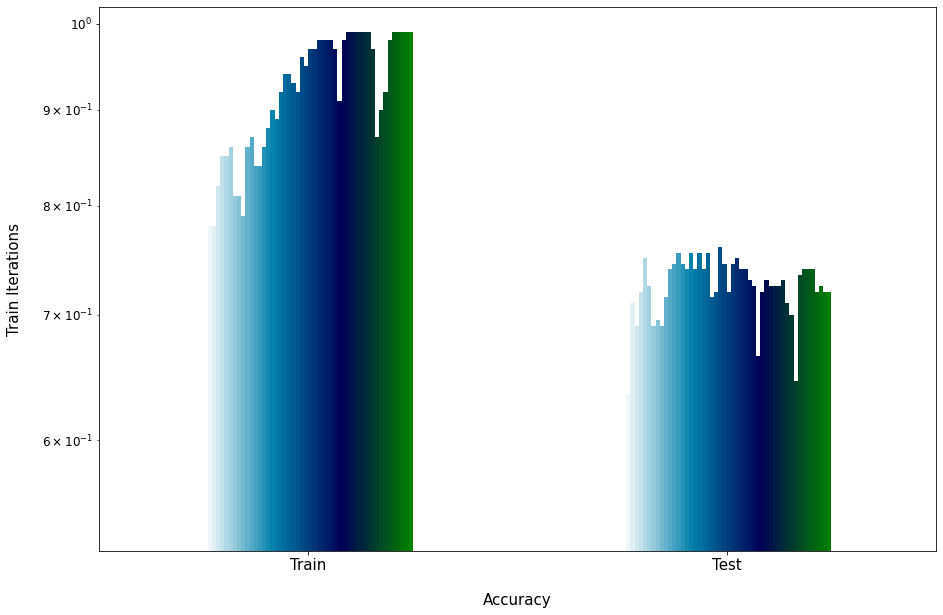

In [123]:
# Based on model performance, we recommend Model 7 and its Training & Testing Accuracy Visualization is shown as below
fig, ax = plt.subplots()
fig.patch.set_alpha(0.5)
results_df.plot(kind='bar', legend = False, figsize=(15,10), logy=True, colormap='ocean_r', ax = ax)
ax.patch.set_alpha(0.6)

ax.set_xlabel( 'Accuracy', rotation=0, fontsize=15, labelpad=20)
ax.set_ylabel( 'Train Iterations', rotation=90, fontsize=15, labelpad=20)

for label in ax.get_xticklabels():
    label.set_rotation(0)
    label.set_size(15)
        
plt.show()